# Ejercicio 2 - Guia 1

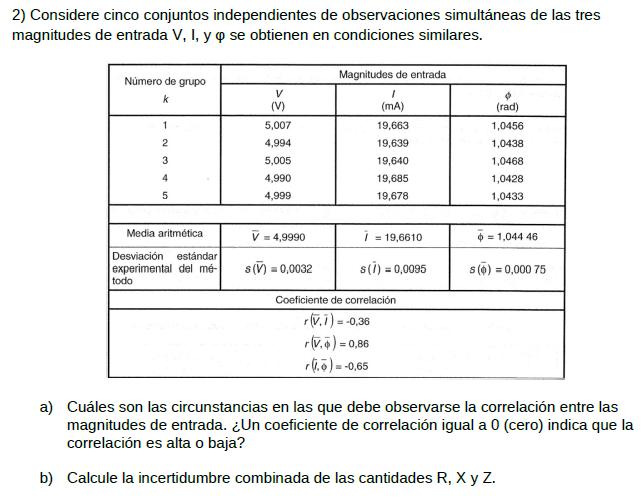

La correlación debe tenerse en cuenta cuando se miden distintas variables sobre un mismo componente, las cuales mantienen algún tipo de relación entre ellas (como sucede en este caso con la tensión, la corriente y el desfasaje).
Un coeficiente de correlación igual a 0 indica que las variables están totalmente descorrelacionadas.

In [6]:
import numpy as np

In [7]:
# Defino vectores
V = np.asarray([5.007, 4.994, 5.005, 4.990, 4.999])
I = np.asarray([19.663, 19.639, 19.640, 19.685, 19.678])*1e-3
Phi = np.asarray([1.0456, 1.0438, 1.0468, 1.0428, 1.0433])

In [8]:
class Medicion:
    
    def __init__(self,med):
        
        self.valores = med
        
        self.n = len(self.valores)
        
        self.media = np.mean(self.valores)
        
        self.ui = np.std(self.valores,ddof = 1) / np.sqrt(self.n)

In [9]:
# Calculo valores medios  
V_med = Medicion(V)
I_med = Medicion(I)
Phi_med = Medicion(Phi)

In [10]:
# Coeficientes de correlación

# corrcoef arroja una matriz con los coeficientes de la correlación entre las variables, 
# incluso con sigo misma. La diagonal principal son los coeficientes de la autocorrelación
Med_mtx = np.array([V,I,Phi])
r = np.corrcoef(Med_mtx)

r_V_I = r[0,1]
r_V_Phi = r[0,2]
r_I_Phi = r[2,1]

print(r_V_I)
print(r_V_Phi)
print(r_I_Phi)

-0.35531121981747704
0.8576242108399617
-0.6451112176892464


In [45]:
# Funciones de medición

# R = (V/I) cos(phi) 
# X = (V/I) sin(phi) 
# Z = V/I

# Calculo derivadas de R
dR_dV = np.cos(Phi_med.media) / I_med.media
dR_dI = -V_med.media * np.cos(Phi_med.media) / I_med.media**2
dR_dPhi = -np.sin(Phi_med.media) * V_med.media / I_med.media

# Calculo derivadas de X
dX_dV = np.sin(Phi_med.media) / I_med.media
dX_dI = -V_med.media * np.sin(Phi_med.media) / I_med.media**2
dX_dPhi = np.cos(Phi_med.media) * V_med.media / I_med.media

# Calculo derivadas de Z
dZ_dV = 1 / I_med.media
dZ_dI = -V_med.media / I_med.media**2
dZ_dPhi = 0

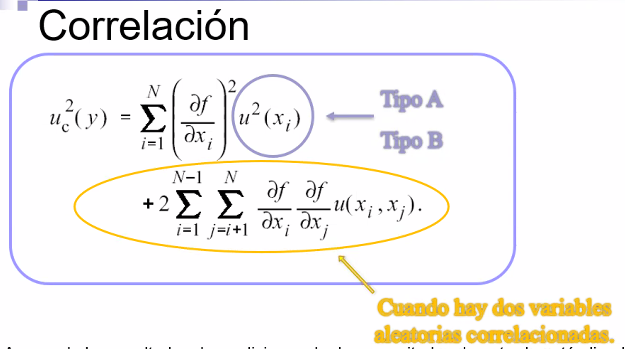

In [46]:
# Incertidumbre Combinada con Variables Correlacionadas

u_r = np.sqrt((dR_dV * V_med.ui)**2 + (dR_dI * I_med.ui)**2 + (dR_dPhi * Phi_med.ui)**2 + \
2 * dR_dV * dR_dI * V_med.ui * I_med.ui * r_V_I + \
2 * dR_dV * dR_dPhi * V_med.ui * Phi_med.ui * r_V_Phi + \
2 * dR_dI * dR_dPhi * I_med.ui * Phi_med.ui * r_I_Phi) 

u_x = np.sqrt((dX_dV * V_med.ui)**2 + (dX_dI * I_med.ui)**2 + (dX_dPhi * Phi_med.ui)**2 + \
2 * dX_dV * dX_dI * V_med.ui * I_med.ui * r_V_I + \
2 * dX_dV * dX_dPhi * V_med.ui * Phi_med.ui * r_V_Phi + \
2 * dX_dI * dX_dPhi * I_med.ui * Phi_med.ui * r_I_Phi) 

u_z = np.sqrt((dZ_dV * V_med.ui)**2 + (dZ_dI * I_med.ui)**2 + (dZ_dPhi * Phi_med.ui)**2 + \
2 * dZ_dV * dZ_dI * V_med.ui * I_med.ui * r_V_I + \
2 * dZ_dV * dZ_dPhi * V_med.ui * Phi_med.ui * r_V_Phi + \
2 * dZ_dI * dZ_dPhi * I_med.ui * Phi_med.ui * r_I_Phi) 

print('Incertidumbre combinada: u_r = {} ohms'.format(np.round(u_r,7)))
print('Incertidumbre combinada: u_x = {} ohms'.format(np.round(u_x,7)))
print('Incertidumbre combinada: u_z = {} ohms'.format(np.round(u_z,7)))

Incertidumbre combinada: u_r = 0.0710714 ohms
Incertidumbre combinada: u_x = 0.2955817 ohms
Incertidumbre combinada: u_z = 0.2363361 ohms
